# EDA Loan Data Analysis


 ## Data Loading

In [313]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
print(os.listdir("."))
df = pd.read_csv('loan_5000.csv')

['.git', '.ipynb_checkpoints', 'loan_5000.csv', 'loan_data_analysis.ipynb', 'Untitled.ipynb']


In [314]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Columns: 145 entries, id to settlement_term
dtypes: float64(66), int64(54), object(25)
memory usage: 5.5+ MB


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

Text(0.5, 1.0, 'Columns where NA values are more than 40%')

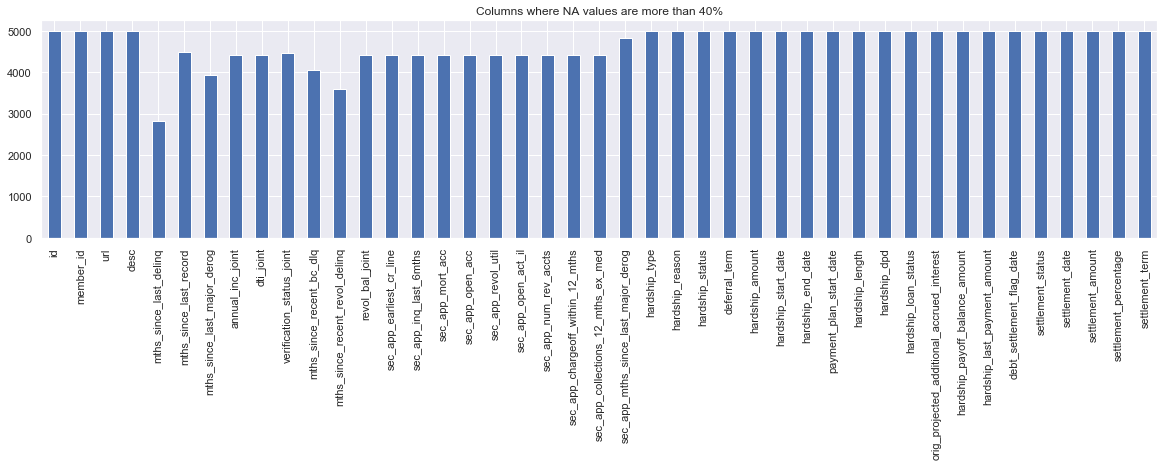

In [315]:
NA_col = df.isnull().sum()
NA_col = NA_col[NA_col.values >(0.4*len(df))]
plt.figure(figsize=(20,4))
NA_col.plot(kind='bar')
plt.title('Columns where NA values are more than 40%')

In [316]:
def removeNulls(dataframe, axis =1, percent=0.3):
    '''
    * removeNull function will remove the rows and columns based on parameters provided.
    * dataframe : Name of the dataframe  
    * axis      : axis = 0 defines drop rows, axis =1(default) defines drop columns    
    * percent   : percent of data where column/rows values are null,default is 0.3(30%)
              
    '''
    df = dataframe.copy()
    ishape = df.shape
    if axis == 0:
        rownames = df.transpose().isnull().sum()
        rownames = list(rownames[rownames.values > percent*len(df)].index)
        df.drop(df.index[rownames],inplace=True) 
        print("\nNumber of Rows dropped\t: ",len(rownames))
    else:
        colnames = (df.isnull().sum()/len(df))
        colnames = list(colnames[colnames.values>=percent].index)
        df.drop(labels = colnames,axis =1,inplace=True)        
        print("Number of Columns dropped\t: ",len(colnames))
        
    print("\nOld dataset rows,columns",ishape,"\nNew dataset rows,columns",df.shape)

    return df


In [317]:
df = removeNulls(df, axis =1,percent = 0.3) #Drop columns with certain missing values

Number of Columns dropped	:  43

Old dataset rows,columns (4999, 145) 
New dataset rows,columns (4999, 102)


In [318]:
df.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,2500,2500,2500,36 months,13.56,84.92,C,C1,Chef,10+ years,...,0.0,1,0,60124,16901,36500,18124,N,Cash,N
1,30000,30000,30000,60 months,18.94,777.23,D,D2,Postmaster,10+ years,...,0.0,1,0,372872,99468,15000,94072,N,Cash,N


In [319]:
df = removeNulls(df, axis =0,percent = 0.3) #Drop rows with certain missing values


Number of Rows dropped	:  0

Old dataset rows,columns (4999, 102) 
New dataset rows,columns (4999, 102)


In [320]:
unique = df.nunique()
unique = unique[unique.values == 1]
df.drop(labels = list(unique.index), axis =1, inplace=True) #Drop columns with no unique values (every value is same = analysis is useless)
print("rows,columns",df.shape) 

rows,columns (4999, 91)


In [321]:
print(df.emp_length.unique())
df.emp_length.fillna('0',inplace=True) #
df.emp_length.replace(['n/a'],'Self-Employed',inplace=True)
print(df.emp_length.unique())

['10+ years' '6 years' '4 years' '< 1 year' '2 years' '9 years' nan
 '5 years' '3 years' '7 years' '1 year' '8 years']
['10+ years' '6 years' '4 years' '< 1 year' '2 years' '9 years' '0'
 '5 years' '3 years' '7 years' '1 year' '8 years']


In [322]:
numeric_columns = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','int_rate','annual_inc','dti']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)
df.tail(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method
4996,5000,5000,5000,36 months,20.89,188.10,D,D4,Care Manager,1 year,...,1,2,87.5,50.0,0,7500,5329,6000,0,Cash
4997,16000,16000,16000,60 months,10.33,342.56,B,B1,Road foreman,10+ years,...,0,1,100.0,0.0,0,99598,62789,11800,77698,Cash
4998,3500,3500,3500,36 months,8.19,109.99,A,A4,NaN,< 1 year,...,0,0,81.8,0.0,0,217350,12566,28600,6000,Cash


In [323]:
(df.purpose.value_counts()*100)/len(df)
del_loan_purpose = (df.purpose.value_counts()*100)/len(df)
del_loan_purpose = del_loan_purpose[(del_loan_purpose < 0.75) | (del_loan_purpose.index == 'other')]
df.drop(labels = df[df.purpose.isin(del_loan_purpose.index)].index, inplace=True)
print("rows,columns",df.shape) 
print(df.purpose.unique())

rows,columns (4659, 91)
['debt_consolidation' 'credit_card' 'car' 'vacation' 'home_improvement'
 'small_business' 'major_purchase' 'medical']


In [324]:
(df.loan_status.value_counts()*100)/len(df)
del_loan_status = (df.loan_status.value_counts()*100)/len(df)
del_loan_status = del_loan_status[(del_loan_status < 1.5)]
df.drop(labels = df[df.loan_status.isin(del_loan_status.index)].index, inplace=True)
print("rows,columns",df.shape) 
print(df.loan_status.unique())

rows,columns (4653, 91)
['Current' 'Fully Paid']


In [325]:
df['loan_income_ratio']= df['loan_amnt']/df['annual_inc']

In [326]:
bins = [0, 5000, 10000, 15000, 20000, 25000,40000]
slot = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000 and above']
df['loan_amnt_range'] = pd.cut(df['loan_amnt'], bins, labels=slot)

In [327]:
bins = [0, 25000, 50000, 75000, 100000,1000000]
slot = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000 and above']
df['annual_inc_range'] = pd.cut(df['annual_inc'], bins, labels=slot)

In [328]:
bins = [0, 7.5, 10, 12.5, 15,20]
slot = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15 and above']
df['int_rate_range'] = pd.cut(df['int_rate'], bins, labels=slot)

In [329]:
df.loan_status

0          Current
1          Current
2          Current
3          Current
4          Current
5          Current
6          Current
7          Current
8          Current
9          Current
10         Current
11         Current
12         Current
13         Current
14         Current
15         Current
17         Current
18         Current
19         Current
20         Current
21         Current
22         Current
23         Current
24         Current
25         Current
27         Current
28         Current
29         Current
30         Current
31         Current
           ...    
4967       Current
4968       Current
4969       Current
4970       Current
4971       Current
4972       Current
4973       Current
4974       Current
4975       Current
4976       Current
4977    Fully Paid
4978       Current
4979       Current
4980       Current
4981       Current
4982       Current
4983       Current
4984       Current
4986       Current
4987       Current
4988       Current
4989       C

In [330]:
df[df.loan_status == 'Current'] = 0
df[df.loan_status == 'Fully Paid'] = 1

ValueError: Cannot setitem on a Categorical with a new category, set the categories first

## Visualizations

In [ ]:
def univariate(df,col,vartype,hue =None):

    sns.set(style="darkgrid")
    
    if vartype == 0: # continuous variable --> produces distribution, violin, or boxplot
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile")
        ax[2].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[2],orient='v')
    
    if vartype == 1: # categorical variable --> produces countplot
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots()
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
        if len(temp.unique()) > 0:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(df))), (p.get_x()+0.05, p.get_height()+20))  
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
    else:
        exit
        
    plt.show()

In [ ]:
univariate(df=df,col='loan_amnt',vartype=0)

In [ ]:
univariate(df=df,col='int_rate',vartype=0)


In [ ]:
df["annual_inc"].describe()

In [ ]:
q = df["annual_inc"].quantile(0.995)
df = df[df["annual_inc"] < q]
df["annual_inc"].describe()

In [ ]:
univariate(df=df,col='annual_inc',vartype=0)


In [ ]:
univariate(df=df,col='loan_status',vartype=1)

In [ ]:
univariate(df=df,col='purpose',vartype=1,hue='loan_status')

In [ ]:
df.home_ownership.unique()


In [ ]:
rem = ['OTHER', 'NONE', 'ANY']
df.drop(df[df['home_ownership'].isin(rem)].index,inplace=True)
df.home_ownership.unique()

In [ ]:
univariate(df=df,col='home_ownership',vartype=1,hue='loan_status')


In [ ]:
year_wise =df.groupby(by= [df.issue_d])[['loan_status']].count()
year_wise.rename(columns={"loan_status": "count"},inplace=True)
ax =year_wise.plot(figsize=(20,8))
year_wise.plot(kind='bar',figsize=(20,8),ax = ax)
plt.show()

In [ ]:
univariate(df=df,col='term',vartype=1,hue='loan_status')


In [ ]:
df.head(3)

In [ ]:
plt.figure(figsize=(16,12))
sns.boxplot(data =df, x='purpose', y='loan_amnt', hue ='loan_status')
plt.title('Purpose of Loan vs Loan Amount')
plt.show()

In [ ]:
loan_correlation = df.corr()
loan_correlation

In [ ]:
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(loan_correlation, 
            xticklabels=loan_correlation.columns.values,
            yticklabels=loan_correlation.columns.values,annot= True)
plt.show()

In [ ]:
loanstatus=df.pivot_table(index=['loan_status','purpose','emp_length'],values='loan_amnt',aggfunc=('count')).reset_index()
loanstatus=df.loc[df['loan_status']=='Charged Off']

In [ ]:
ax = plt.figure(figsize=(30, 18))
ax = sns.boxplot(x='emp_length',y='loan_amnt',hue='purpose',data=loanstatus)
ax.set_title('Employment Length vs Loan Amount for different pupose of Loan',fontsize=22,weight="bold")
ax.set_xlabel('Employment Length',fontsize=16)
ax.set_ylabel('Loan Amount',color = 'b',fontsize=16)
plt.show()

## Validations/Transformations

In [ ]:
features = df.drop(['loan_status'], axis=1)
features

# define our target

target = df[['loan_status']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
y_train.columns

In [ ]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

# predict
y_train_preds = logisticRegr.predict(X_train)
y_test_preds  = logisticRegr.predict(X_test)

## Training 

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test_preds, y_test)
cnf_matrix
print("Accuracy:",metrics.accuracy_score(y_test, y_test_preds))
print("Precision:",metrics.precision_score(y_test, y_test_preds))
print("Recall:",metrics.recall_score(y_test, y_test_preds))

## Summary

The loan data set was far too big as there were over 1 million different rows, so I decided to trim it down to a significantly smaller sample size of approximately the first 5000 rows under a new csv file named "loan_5000". I used this method because df.sample(n) would require me to load the entire dataset, which my computer would not be able to easily process. However, as discovered, the confusion matrix predictions ended up with an accuracy of 1.0, a precision of 1.0, and a recall of 1.0, which showed that the sample size was far too small in spite of the otherwise accurate model. 

For the bivariate analysis, I used a correlation matrix an overlaid it with a heatmap in order to find variables that have either a strong direct or inverse proportionality with loan_status, and I then performed algorithms and cleaning techniques with those variables as they were the most important.